In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\APZIVA\Project 5\stock_price_data.csv')

In [3]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31-Mar-21,291.02,294.00,294.42,290.26,47.00M,-0.76%
1,30-Mar-21,293.25,294.86,295.72,291.50,38.81M,-0.02%
2,29-Mar-21,293.30,289.72,294.09,289.26,43.68M,0.71%
3,26-Mar-21,291.22,288.63,292.75,288.32,56.07M,1.59%
4,25-Mar-21,286.66,286.50,287.03,283.85,35.22M,0.30%


In [4]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
306,10-Jan-20,258.19,257.86,259.25,256.88,18.85M,0.08%
307,9-Jan-20,257.99,259.40,261.76,257.01,38.33M,-0.45%
308,8-Jan-20,259.15,253.57,259.15,253.03,40.82M,2.07%
309,6-Jan-20,253.90,254.75,254.84,251.40,22.35M,-0.43%
310,3-Jan-20,255.00,255.99,258.19,253.70,35.85M,0.10%


In [5]:
data = data.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'])

In [6]:
data['Price'] = data['Price'].astype(float)

In [7]:
data.head()

,Date,Price
0,31-Mar-21,291.02
1,30-Mar-21,293.25
2,29-Mar-21,293.30
3,26-Mar-21,291.22
4,25-Mar-21,286.66


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    311 non-null    object 
 1   Price   311 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


**convert to a datetime object**

In [9]:
# change 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    311 non-null    datetime64[ns]
 1   Price   311 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


**sort in ascending order by Date**

In [11]:
data = data.sort_values(by='Date')

In [12]:
def lineplot(x,y,data_,title_):
    sns.set(rc = {'figure.figsize':(15,8)})
    # Bigger than normal fonts
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x = x, y = y, data = data_)
    chart.set(title=title_)
    plt.show()

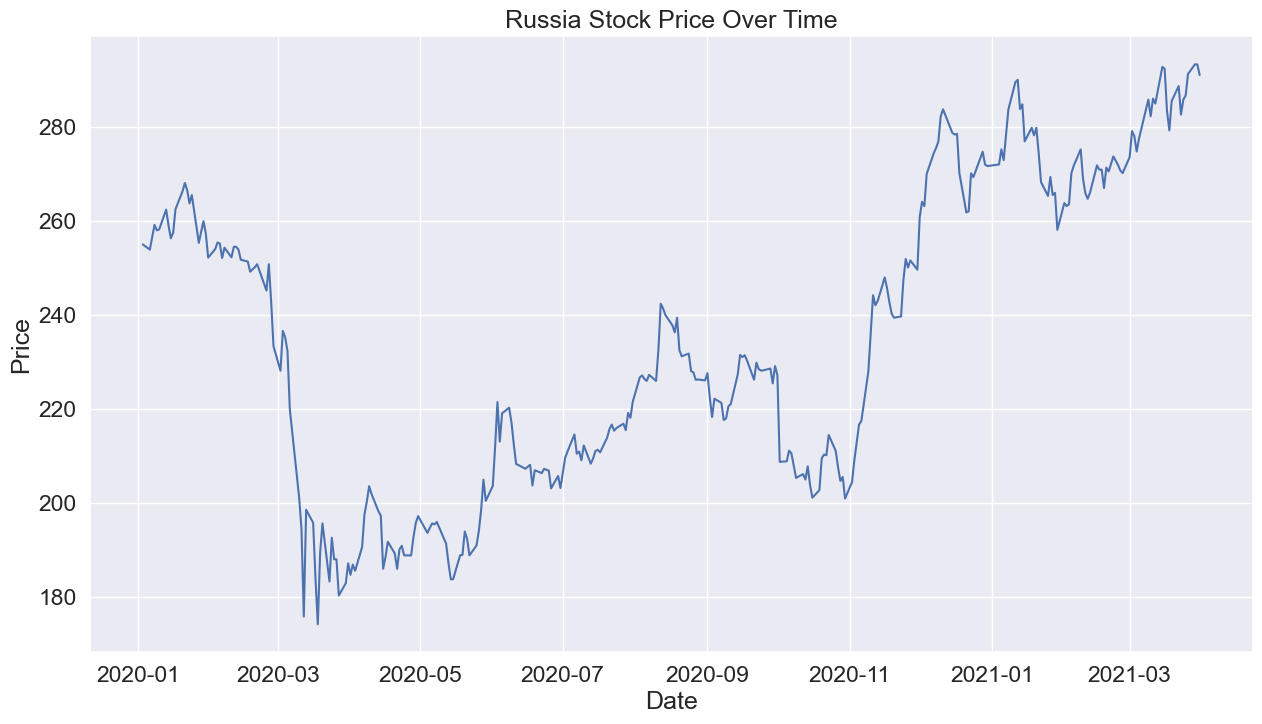

In [13]:
lineplot(x='Date',y='Price',data_=data,title_='Russia Stock Price Over Time')

In [14]:
# **create train_data**
train_data = data[data.Date <= '2020-12-31']

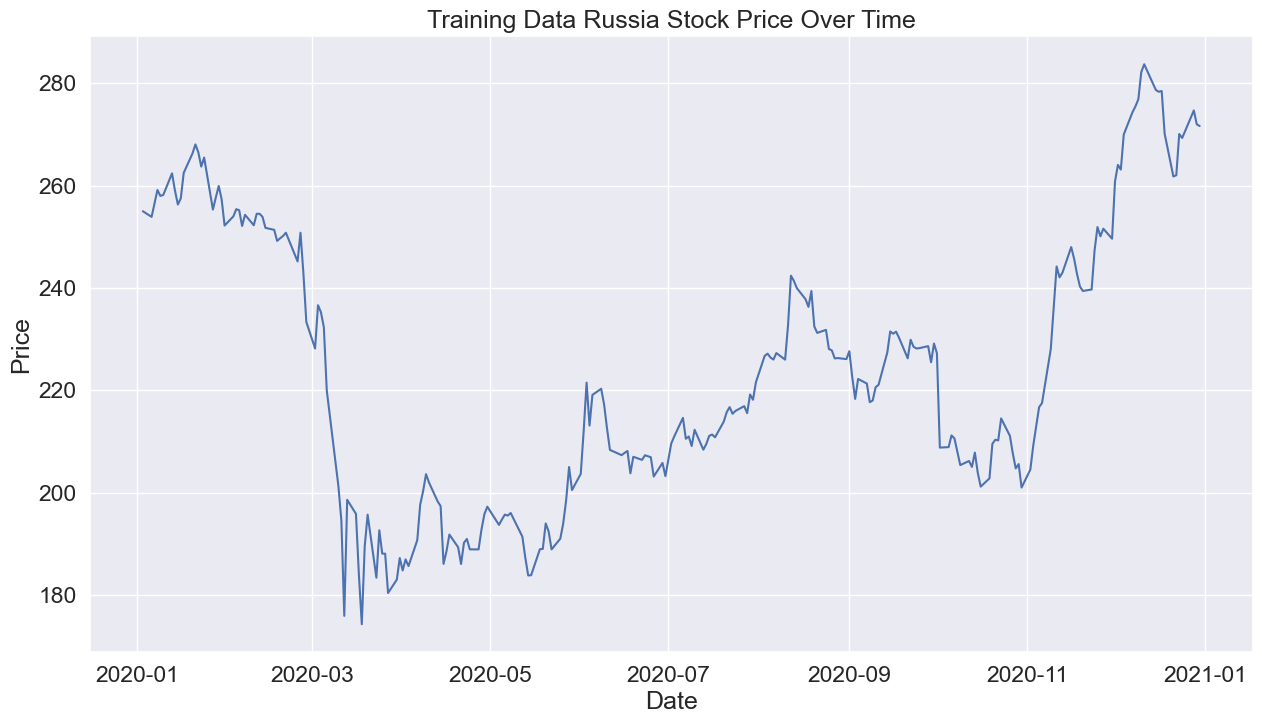

In [15]:
# plot the training data over time

lineplot(x='Date',y='Price',data_=train_data,title_='Training Data Russia Stock Price Over Time')

In [16]:
train_data.head()

,Date,Price
310,2020-01-03,255.00
309,2020-01-06,253.90
308,2020-01-08,259.15
307,2020-01-09,257.99
306,2020-01-10,258.19


Calculate the 30-day moving average using the training data


C:\Users\dgarb\AppData\Local\Temp\ipykernel_13428\3040810722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()


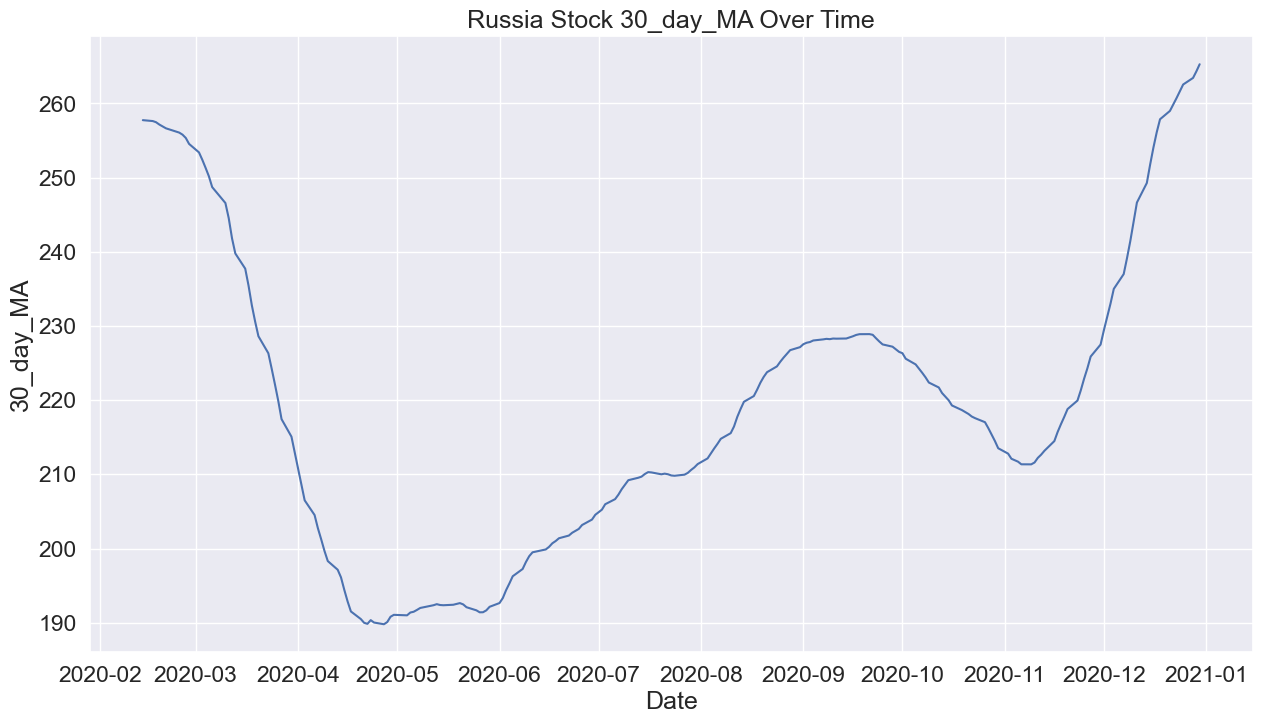

In [17]:
# Note: window size is the number of days you go back to calculate
window_size = 30
train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()

# Plot the stock price and 30-day moving average of the Training Data
lineplot(x ='Date',y ='30_day_MA',data_= train_data,title_='Russia Stock 30_day_MA Over Time')

In [18]:
train_data

,Date,Price,30_day_MA
310,2020-01-03,255.00,NaN
309,2020-01-06,253.90,NaN
308,2020-01-08,259.15,NaN
307,2020-01-09,257.99,NaN
306,2020-01-10,258.19,NaN
...,...,...,...
65,2020-12-24,269.32,261.631000
64,2020-12-25,270.64,262.552667
63,2020-12-28,274.70,263.443000
62,2020-12-29,272.00,264.319667


**Extend Data for Forecasting**

To forecast using the moving average, you need to continue calculating the moving average into the forecast period. Since the moving average relies on past data, you'll use the most recent available data to predict future values.

**Generate Forecasts for Q1 2021**

In [20]:
# Calculate the 30-day moving average
window_size = 30
train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()

C:\Users\dgarb\AppData\Local\Temp\ipykernel_13428\1610044791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['30_day_MA'] = train_data['Price'].rolling(window=window_size).mean()


In [21]:
# Define the forecast period (Q1 2021)
forecast_period = pd.date_range(start='2021-01-01', end='2021-03-31')

# Initialize a DataFrame to store the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_period, 'Forecast': np.nan})

# forecast_df

In [22]:
# Use the last available 'window_size' days from the training data to start the forecast
last_window_data = train_data['Price'].iloc[-window_size:].values #generates Numpy array
# last_window_data

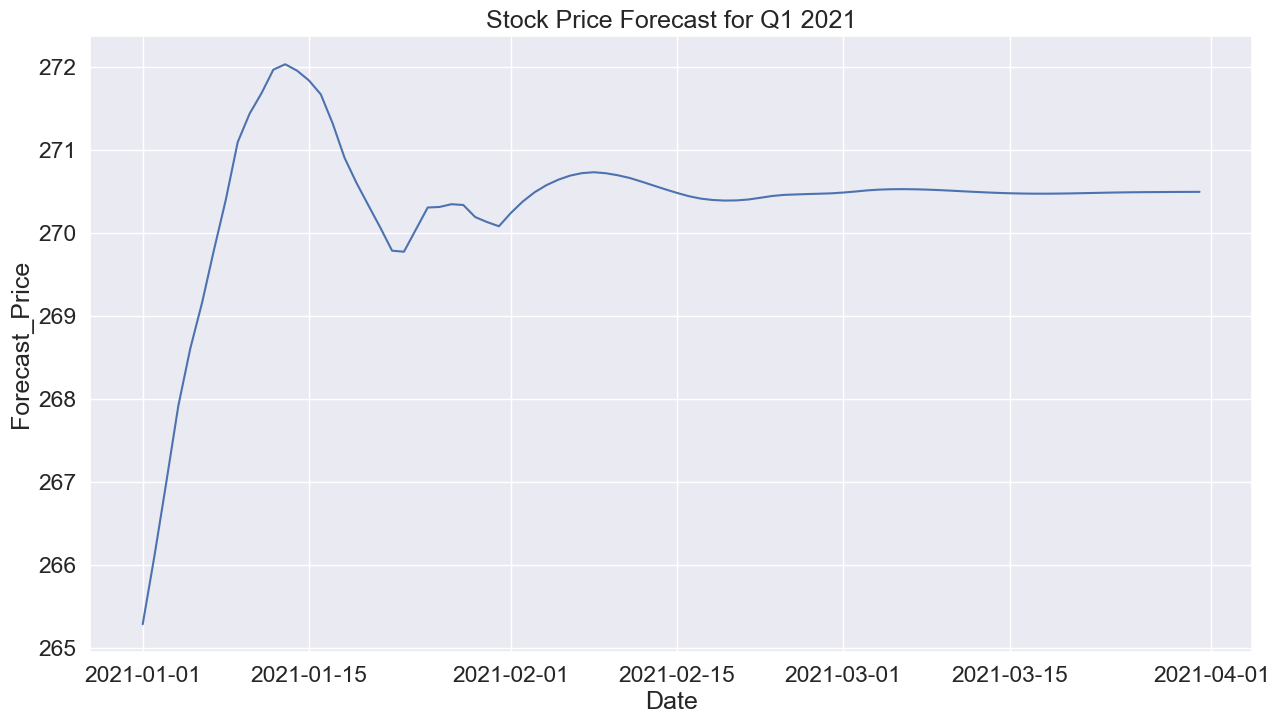

In [23]:
# Extend the forecast using the moving average logic
for i, date in enumerate(forecast_period):
    forecast_value = np.mean(last_window_data)
    forecast_df.at[i, 'Forecast'] = forecast_value
    # Update the window data by appending the forecast value and removing the oldest value
    last_window_data = np.append(last_window_data[1:], forecast_value)
    
# Rename columns for consistency in plotting
forecast_df = forecast_df.rename(columns={'Forecast': 'Forecast_Price'})

lineplot(x='Date', y='Forecast_Price', data_=forecast_df, title_='Stock Price Forecast for Q1 2021')


In [24]:
test_data =data[data.Date > '2020-12-31']
# data.reset_index()

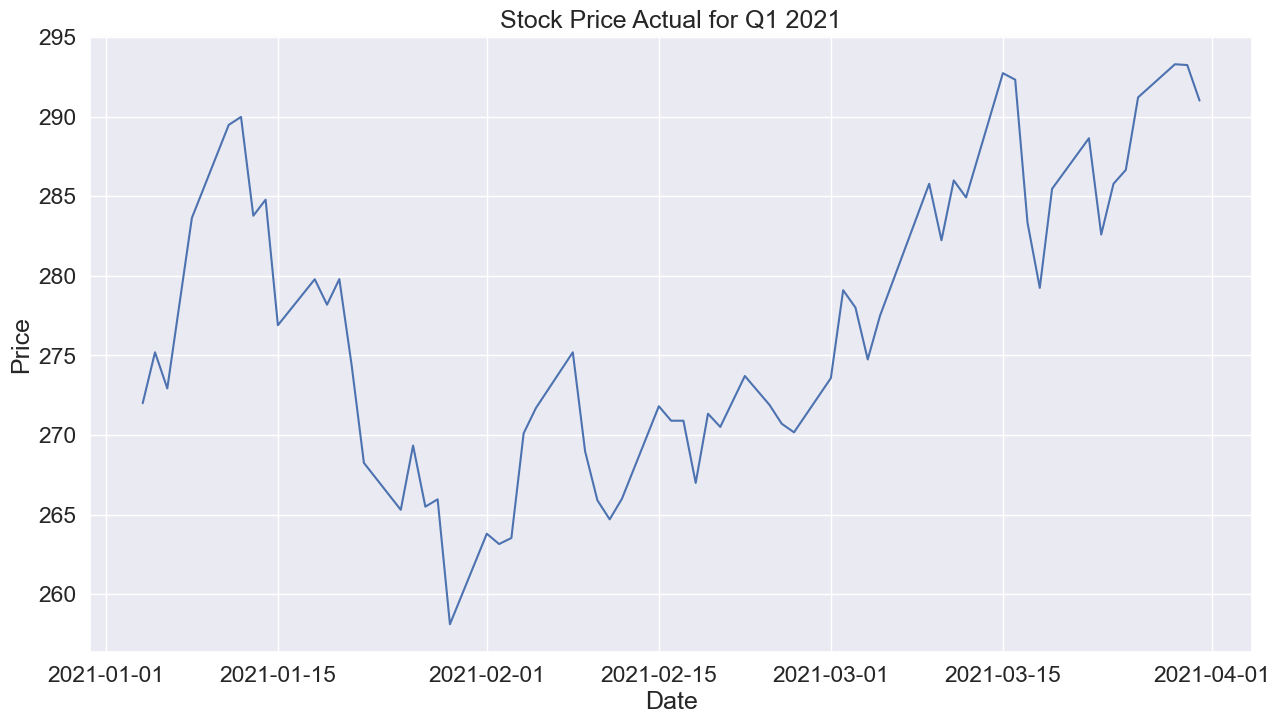

In [25]:
lineplot(x='Date', y='Price', data_=test_data, title_='Stock Price Actual for Q1 2021')


In [26]:
# Merge test_data with forecast_df on 'Date'
merged_data = pd.merge(test_data, forecast_df, on='Date', how='outer')
merged_data.head()

,Date,Price,Forecast_Price
0,2021-01-04,272.00,267.918352
1,2021-01-05,275.20,268.604630
2,2021-01-06,272.93,269.161118
3,2021-01-08,283.64,270.403372
4,2021-01-11,289.49,271.684634


In [27]:
# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(merged_data, id_vars=['Date'], value_vars=['Price', 'Forecast_Price'], 
                      var_name='Type', value_name='Value')
print(melted_data.head())
print(melted_data.tail())

        Date   Type   Value
0 2021-01-04  Price  272.00
1 2021-01-05  Price  275.20
2 2021-01-06  Price  272.93
3 2021-01-08  Price  283.64
4 2021-01-11  Price  289.49
          Date            Type       Value
175 2021-03-14  Forecast_Price  270.484482
176 2021-03-20  Forecast_Price  270.477853
177 2021-03-21  Forecast_Price  270.480490
178 2021-03-27  Forecast_Price  270.493862
179 2021-03-28  Forecast_Price  270.494811


In [28]:
def lineplot2 (x, y, hue, data_, title_):
    sns.set(rc={'figure.figsize': (15, 8)})
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    chart = sns.lineplot(x=x, y=y, hue=hue, data=data_)
    chart.set(title=title_)
    plt.show()

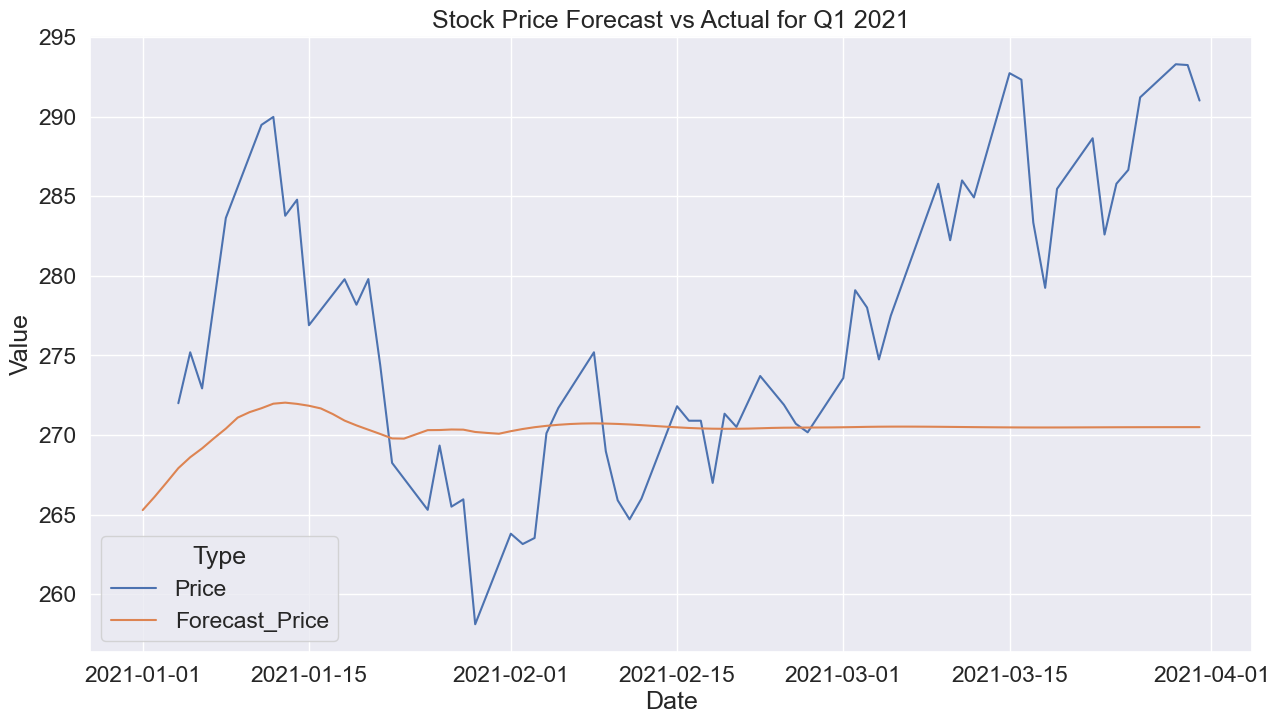

In [29]:
## Plot the results
lineplot2(x='Date', y='Value', hue='Type', data_=melted_data, title_='Stock Price Forecast vs Actual for Q1 2021')
